In [36]:
import torch
import torch.nn as nn
%matplotlib inline
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [38]:
t_un = t_u * 0.1

n_samples = t_u.shape[0]
rand_samples = torch.randperm(n_samples)

n_val_samples = int(0.2 * n_samples)

train_ind = rand_samples[:-n_val_samples]
val_ind = rand_samples[-n_val_samples:]

train_ind, val_ind

(tensor([ 4,  5,  8,  1,  3,  0,  7, 10,  2]), tensor([9, 6]))

In [39]:
t_un_train = t_un[train_ind]
t_c_train = t_c[train_ind]

t_un_val = t_un[val_ind]
t_c_val = t_c[val_ind]

t_c_train, t_un_val

(tensor([[11.0000],
         [ 8.0000],
         [ 6.0000],
         [14.0000],
         [28.0000],
         [ 0.5000],
         [-4.0000],
         [21.0000],
         [15.0000]]),
 tensor([[6.0400],
         [3.3900]]))

In [57]:
seq_model = nn.Sequential(
    nn.Linear(1, 128),
    nn.Tanh(),
    nn.Linear(128, 128),
    nn.Tanh(),
    nn.Linear(128, 128),
    nn.Tanh(),
    nn.Linear(128, 1)
)
seq_model, [param.shape for param in seq_model.parameters()]

(Sequential(
   (0): Linear(in_features=1, out_features=128, bias=True)
   (1): Tanh()
   (2): Linear(in_features=128, out_features=128, bias=True)
   (3): Tanh()
   (4): Linear(in_features=128, out_features=128, bias=True)
   (5): Tanh()
   (6): Linear(in_features=128, out_features=1, bias=True)
 ),
 [torch.Size([128, 1]),
  torch.Size([128]),
  torch.Size([128, 128]),
  torch.Size([128]),
  torch.Size([128, 128]),
  torch.Size([128]),
  torch.Size([1, 128]),
  torch.Size([1])])

In [50]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        with torch.no_grad():
            t_p_val = model(t_u_val)
            loss_val = loss_fn(t_p_val, t_c_val)
            assert loss_val.requires_grad == False
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Train loss {loss_train.item():.4f}, Val loss {loss_val.item():.4f}")
            
    return list(model.parameters())

In [58]:
optimizer = optim.Adam(seq_model.parameters(), lr=1e-4)

In [60]:
training_loop(
    n_epochs=10000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

Epoch 500, Train loss 0.5126, Val loss 12.3930
Epoch 1000, Train loss 0.5073, Val loss 11.4190
Epoch 1500, Train loss 0.5046, Val loss 10.8232
Epoch 2000, Train loss 0.5032, Val loss 10.5113
Epoch 2500, Train loss 0.5023, Val loss 10.3421
Epoch 3000, Train loss 0.5029, Val loss 10.2252
Epoch 3500, Train loss 0.5013, Val loss 10.0791
Epoch 4000, Train loss 0.5011, Val loss 9.9804
Epoch 4500, Train loss 0.5030, Val loss 9.9262
Epoch 5000, Train loss 0.5007, Val loss 9.8707
Epoch 5500, Train loss 0.4997, Val loss 9.7012
Epoch 6000, Train loss 0.3684, Val loss 6.6054
Epoch 6500, Train loss 0.2114, Val loss 6.4167
Epoch 7000, Train loss 0.0791, Val loss 6.2772
Epoch 7500, Train loss 0.0189, Val loss 5.9992
Epoch 8000, Train loss 0.0026, Val loss 5.6517
Epoch 8500, Train loss 0.0001, Val loss 5.4395
Epoch 9000, Train loss 0.0000, Val loss 5.4541
Epoch 9500, Train loss 0.0000, Val loss 5.4554
Epoch 10000, Train loss 0.0000, Val loss 5.4431


[Parameter containing:
 tensor([[ 1.0052],
         [-0.1325],
         [-0.1670],
         [-0.0929],
         [ 0.3787],
         [-0.1425],
         [ 0.7347],
         [ 1.0140],
         [-0.7721],
         [ 0.8217],
         [-0.5284],
         [-0.9299],
         [ 0.8800],
         [ 0.7577],
         [ 0.2177],
         [ 0.7305],
         [-0.7991],
         [ 0.8792],
         [-0.6186],
         [-1.0012],
         [ 0.1224],
         [-0.2437],
         [ 0.4334],
         [-1.0022],
         [ 0.8802],
         [-0.7642],
         [-0.2116],
         [-0.9460],
         [-0.1370],
         [ 0.2197],
         [-0.2704],
         [-0.2032],
         [-0.9269],
         [ 0.6181],
         [-0.3155],
         [ 0.1432],
         [ 0.2165],
         [-0.1148],
         [-0.5221],
         [-0.1338],
         [ 0.9162],
         [-0.1885],
         [-0.1373],
         [ 0.8349],
         [-0.9753],
         [-0.6798],
         [-0.2824],
         [ 0.1893],
         [ 0.1059

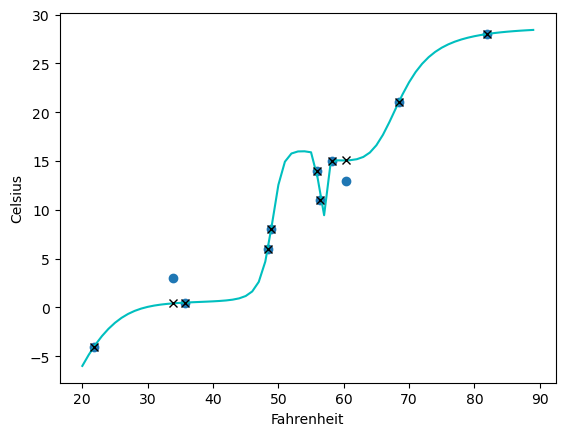

In [61]:
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=100)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [63]:
import csv
import numpy as np
wine_path = "winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]],
      shape=(4898, 12), dtype=float32)

In [64]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [116]:
data = wineq[:, :-1]
target = wineq[:, -1].unsqueeze(1)
data, data.shape, target, target.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]),
 tensor([[6.],
         [6.],
         [6.],
         ...,
         [6.],
         [7.],
         [6.]]),
 torch.Size([4898, 1]))

In [117]:
n_samples_wine = data.shape[0]
rand_samples_wine = torch.randperm(n_samples_wine)

n_val_samples_wine = int(0.2 * n_samples_wine)

train_ind_wine = rand_samples_wine[:-n_val_samples_wine]
val_ind_wine = rand_samples_wine[-n_val_samples_wine:]

# train_ind_wine, val_ind_wine

In [118]:
target_train = target[train_ind_wine]
data_train = data[train_ind_wine]

target_val = target[val_ind_wine]
data_val = data[val_ind_wine]

data_train.shape, target_val.shape

(torch.Size([3919, 11]), torch.Size([979, 1]))

In [129]:
seq_model_wine = nn.Sequential(
    nn.Linear(11, 128),
    nn.Tanh(),
    nn.Linear(128, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 1)
)
seq_model, [param.shape for param in seq_model_wine.parameters()]

(Sequential(
   (0): Linear(in_features=1, out_features=128, bias=True)
   (1): Tanh()
   (2): Linear(in_features=128, out_features=128, bias=True)
   (3): Tanh()
   (4): Linear(in_features=128, out_features=128, bias=True)
   (5): Tanh()
   (6): Linear(in_features=128, out_features=1, bias=True)
 ),
 [torch.Size([128, 11]),
  torch.Size([128]),
  torch.Size([256, 128]),
  torch.Size([256]),
  torch.Size([128, 256]),
  torch.Size([128]),
  torch.Size([1, 128]),
  torch.Size([1])])

In [130]:
optimizer_wine = optim.Adam(seq_model_wine.parameters(), lr=1e-4)

In [132]:
training_loop(
    n_epochs=5000,
    optimizer=optimizer_wine,
    model=seq_model_wine,
    loss_fn=nn.MSELoss(),
    t_u_train=data_train,
    t_u_val=data_val,
    t_c_train=target_train,
    t_c_val=target_val
)

Epoch 500, Train loss 0.7305, Val loss 0.7179
Epoch 1000, Train loss 0.6342, Val loss 0.6362
Epoch 1500, Train loss 0.5704, Val loss 0.5788
Epoch 2000, Train loss 0.5291, Val loss 0.5364
Epoch 2500, Train loss 0.5085, Val loss 0.5235
Epoch 3000, Train loss 0.4942, Val loss 0.5194
Epoch 3500, Train loss 0.4812, Val loss 0.5184
Epoch 4000, Train loss 0.4690, Val loss 0.5183
Epoch 4500, Train loss 0.4577, Val loss 0.5218
Epoch 5000, Train loss 0.4474, Val loss 0.5223


[Parameter containing:
 tensor([[ 0.3956,  0.3917, -0.1342,  ...,  0.1949, -0.0321,  0.0986],
         [-0.0819, -0.5104, -0.4599,  ..., -0.2714,  0.6621,  0.1516],
         [ 0.2914,  0.0718, -0.0619,  ..., -0.1045,  0.3173,  0.1502],
         ...,
         [-0.0226, -0.1495, -0.1326,  ...,  0.1454,  0.0948, -0.0770],
         [ 0.1538, -0.2408, -0.1975,  ..., -0.0924,  0.1342,  0.1660],
         [-0.1944, -0.1525,  0.7773,  ..., -0.0720,  0.7634, -0.0425]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.2863, -0.1758, -0.0479, -0.2116, -0.3251, -0.0241,  0.2530, -0.1175,
         -0.2048, -0.2662, -0.6235, -0.1662,  0.1286, -0.5121,  0.0831,  0.2516,
          0.0514,  0.0701,  0.0280, -0.2111, -0.0742, -0.1367, -0.0208,  0.0597,
         -0.4194,  0.2143,  0.1780, -0.0850, -0.1720,  0.4468,  0.2342,  0.3879,
          0.2322,  0.4405,  0.0446, -0.0474, -0.6015,  0.1556,  0.4244, -0.1251,
         -0.0286,  0.0162,  0.1175, -0.0319, -0.2555,  0.4918, -0.4954,  0.1502

In [138]:
data_val[12], target_val[12]

(tensor([7.6000e+00, 2.0000e-01, 3.0000e-01, 1.4200e+01, 5.6000e-02, 5.3000e+01,
         2.1250e+02, 9.9900e-01, 3.1400e+00, 4.6000e-01, 8.9000e+00]),
 tensor([8.]))

In [139]:
seq_model_wine(data_val[12])

tensor([6.0990], grad_fn=<ViewBackward0>)